### 1. 计算所有地区的所有BEV的销量，并以此利用线性回归，多项式回归模型模型预测2023与2024年的销量。

In [1]:
# 读取数据集
import pandas as pd

# 加载数据
file_path = "Global EV 2023.csv"
data = pd.read_csv(file_path)

# 显示数据的基本信息
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6739 entries, 0 to 6738
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      6739 non-null   object 
 1   category    6739 non-null   object 
 2   parameter   6739 non-null   object 
 3   mode        6739 non-null   object 
 4   powertrain  6739 non-null   object 
 5   year        6739 non-null   int64  
 6   unit        6739 non-null   object 
 7   value       6739 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 421.3+ KB


(None,
       region    category       parameter  mode powertrain  year      unit  \
 0  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
 1  Australia  Historical  EV sales share  Cars         EV  2011   percent   
 2  Australia  Historical  EV stock share  Cars         EV  2011   percent   
 3  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
 4  Australia  Historical        EV sales  Cars        BEV  2012  Vehicles   
 
        value  
 0   49.00000  
 1    0.00650  
 2    0.00046  
 3   49.00000  
 4  170.00000  )

In [2]:
# 筛选数据：category='Historical', parameter='EV sales', mode='Cars', powertrain='BEV' 保证了数据集是电车销量
ev_sales_bev = data[(data['category'] == 'Historical') &
                    (data['parameter'] == 'EV sales') &
                    (data['mode'] == 'Cars') &
                    (data['powertrain'] == 'BEV')]

# 筛选结果的基本信息
ev_sales_bev.head(), ev_sales_bev.shape


(       region    category parameter  mode powertrain  year      unit  value
 3   Australia  Historical  EV sales  Cars        BEV  2011  Vehicles   49.0
 4   Australia  Historical  EV sales  Cars        BEV  2012  Vehicles  170.0
 15  Australia  Historical  EV sales  Cars        BEV  2013  Vehicles  190.0
 16  Australia  Historical  EV sales  Cars        BEV  2014  Vehicles  370.0
 27  Australia  Historical  EV sales  Cars        BEV  2015  Vehicles  760.0,
 (379, 8))

In [3]:
# 筛选出所有国家2013-2022年的数据
ev_sales_bev_2013_2022 = ev_sales_bev[(ev_sales_bev['year'] >= 2013) & (ev_sales_bev['year'] <= 2022)]

# 显示数据结构
ev_sales_bev_2013_2022.head(), ev_sales_bev_2013_2022.shape


(       region    category parameter  mode powertrain  year      unit   value
 15  Australia  Historical  EV sales  Cars        BEV  2013  Vehicles   190.0
 16  Australia  Historical  EV sales  Cars        BEV  2014  Vehicles   370.0
 27  Australia  Historical  EV sales  Cars        BEV  2015  Vehicles   760.0
 28  Australia  Historical  EV sales  Cars        BEV  2016  Vehicles   670.0
 35  Australia  Historical  EV sales  Cars        BEV  2017  Vehicles  1200.0,
 (309, 8))

In [4]:
# 按年份对全球纯电动汽车销量数据求和
# 土耳其2013年数据缺失，这里将土耳其2012的数据作为2013进行计算
global_ev_sales_per_year = ev_sales_bev_2013_2022.groupby('year')['value'].sum()

# 查看每年的全球电动车销量总和
global_ev_sales_per_year


year
2013     113855.0
2014     194907.0
2015     327092.0
2016     464512.0
2017     750220.0
2018    1367350.0
2019    1521510.0
2020    1973252.0
2021    4560890.0
2022    7164980.0
Name: value, dtype: float64

## Linear Regression

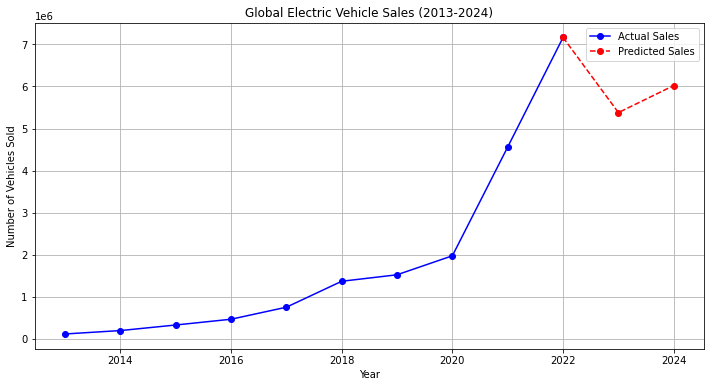

In [6]:
import matplotlib.pyplot as plt

# 构建一个包括预测数据的完整年份和销量数据集
years_extended = np.append(global_ev_sales_per_year.index, [2023, 2024])
sales_extended = np.append(global_ev_sales_per_year.values, [predicted_sales_flat[0], predicted_sales_flat[1]])

# 绘图
plt.figure(figsize=(12, 6))
plt.plot(years_extended[:-2], sales_extended[:-2], label='Actual Sales', marker='o', color='blue')
plt.plot(years_extended[-3:], sales_extended[-3:], label='Predicted Sales', marker='o', linestyle='--', color='red')
plt.title('Global Electric Vehicle Sales (2013-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Sold')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 准备数据
years = np.array(global_ev_sales_per_year.index).reshape(-1, 1)
sales = np.array(global_ev_sales_per_year.values).reshape(-1, 1)

# 创建并拟合线性回归模型
model = LinearRegression()
model.fit(years, sales)

# 预测2023年和2024年的销量
predict_years = np.array([2023, 2024]).reshape(-1, 1)
predicted_sales = model.predict(predict_years)

# 转换为更易读的格式
predicted_sales_flat = predicted_sales.flatten()
predicted_sales_dict = dict(zip(predict_years.flatten(), predicted_sales_flat))
predicted_sales_dict


{2023: 5378554.466666698, 2024: 6021226.769696951}

In [24]:
# 转换为整数并去除小数点
predicted_sales_flat = predicted_sales_flat.astype(int)

print(predicted_sales_flat)

[5378554 6021226]


In [7]:
# 将年份（索引）转换为二维数组
years = np.array(global_ev_sales_per_year.index).reshape(-1, 1)

# 将销量数据提取为一维数组
sales = np.array(global_ev_sales_per_year.values)

# 查看这些数据：
print("Years:", years.flatten())
print("Sales:", sales)


Years: [2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]
Sales: [ 113855.  194907.  327092.  464512.  750220. 1367350. 1521510. 1973252.
 4560890. 7164980.]


## Polynomial

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 创建多项式回归模型，这里选择二次多项式
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# 使用2013-2022年的数据训练模型
poly_model.fit(years, sales)

# 预测2023年和2024年的销量
predicted_sales_poly = poly_model.predict(predict_years)

# 转换为更易读的格式
predicted_sales_poly_flat = predicted_sales_poly.flatten()
predicted_sales_poly_dict = dict(zip(predict_years.flatten(), predicted_sales_poly_flat))
predicted_sales_poly_dict


{2023: 8416547.302368164, 2024: 10716306.605834961}

In [23]:
# 转换为整数并去除小数点
predicted_sales_poly_flat = predicted_sales_poly_flat.astype(int)

print(predicted_sales_poly_flat)

[ 8416547 10716306]


## Poly3

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 创建多项式回归模型，这里选择3次多项式
degree = 3
poly3_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# 使用2013-2022年的数据训练模型
poly3_model.fit(years, sales)

# 预测2023年和2024年的销量
predicted_sales_poly3 = poly3_model.predict(predict_years)

# 转换为更易读的格式
predicted_sales_poly3_flat = predicted_sales_poly3.flatten()
predicted_sales_poly3_dict = dict(zip(predict_years.flatten(), predicted_sales_poly3_flat))
predicted_sales_poly3_dict

{2023: 10696134.78125, 2024: 15488005.78125}

In [21]:
# 转换为整数并去除小数点
predicted_sales_poly3_flat = predicted_sales_poly3_flat.astype(int)

print(predicted_sales_poly3_flat)


[10696134 15488005]


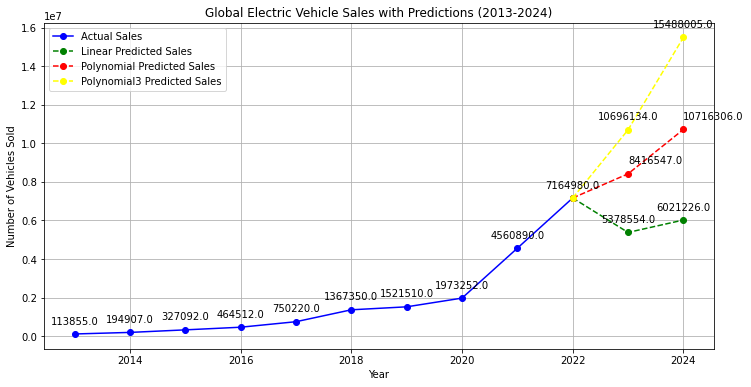

In [41]:
# 数据贮备
years_plot = np.append(years.flatten(), [2023, 2024])
actual_and_predicted_sales = np.append(sales, predicted_sales_flat)
predicted_sales_poly_plot = np.append(sales, predicted_sales_poly_flat)
predicted_sales_poly3_plot = np.append(sales, predicted_sales_poly3_flat)

# 绘图
plt.figure(figsize=(12, 6))
plt.plot(years_plot[:-2], actual_and_predicted_sales[:-2], label='Actual Sales', marker='o', color='blue')
plt.plot(years_plot[-3:], actual_and_predicted_sales[-3:], label='Linear Predicted Sales', marker='o', linestyle='--', color='green')
plt.plot(years_plot[-3:], predicted_sales_poly_plot[-3:], label='Polynomial Predicted Sales', marker='o', linestyle='--', color='red')
plt.plot(years_plot[-3:], predicted_sales_poly3_plot[-3:], label='Polynomial3 Predicted Sales', marker='o', linestyle='--', color='yellow')

# 数据标签添加
for i, txt in enumerate(sales):
    plt.annotate(txt, (years_plot[i], sales[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(actual_and_predicted_sales[-2:]):
    plt.annotate(txt, (years_plot[-2:][i], actual_and_predicted_sales[-2:][i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(predicted_sales_poly_plot[-2:]):
    plt.annotate(txt, (years_plot[-2:][i], predicted_sales_poly_plot[-2:][i]), textcoords="offset points", xytext=(0,10), ha='left')
for i, txt in enumerate(predicted_sales_poly3_plot[-2:]):
    plt.annotate(txt, (years_plot[-2:][i], predicted_sales_poly3_plot[-2:][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Global Electric Vehicle Sales with Predictions (2013-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Sold')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
actual_sales_data_2023 = 14280000

### 2. 对所有国家的13-22年销量进行聚类分析，利用K-means将所有地区分为三个聚类(肘部图)

In [42]:
# 计算每个地区/国家2013-2022年的总销量
total_sales_per_region = ev_sales_bev_2013_2022.groupby('region')['value'].sum()

# 查看每个地区/国家的总销量
total_sales_per_region.sort_values(ascending=False).head()


region
China             10614000.0
USA                2349000.0
Germany            1181300.0
United Kingdom      667300.0
France              637800.0
Name: value, dtype: float64

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


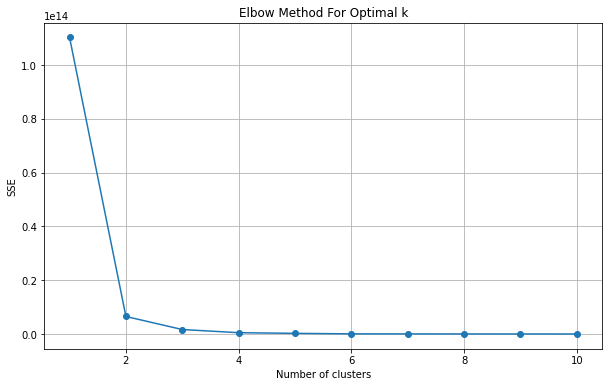

In [43]:
# 使用肘部法则来确定最优的聚类数量
# 计算不同聚类数目的总内平方和（SSE）
from sklearn.cluster import KMeans
sales_data = np.array(total_sales_per_region.values).reshape(-1, 1)


sse = []
for k in range(1, 11):  # 测试1到10个聚类
    kmeans = KMeans(n_clusters=k, random_state=0).fit(sales_data)
    sse.append(kmeans.inertia_)  # 每个模型的SSE

# 绘制肘部图
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.grid(True)
plt.show()


In [69]:
from sklearn.cluster import KMeans
import numpy as np

# 准备数据，将销量数据转换为适合进行K-means聚类的格式（二维数组）
sales_data = np.array(total_sales_per_region.values).reshape(-1, 1)

# 使用KMeans进行聚类分析，这里假定我们分为3个类，在之前的肘部图里可以发现斜率在3时下降变缓
kmeans = KMeans(n_clusters=3, random_state=0).fit(sales_data)

# 获取聚类结果
clusters = kmeans.labels_

# 将聚类结果与国家名称结合
clustered_data = pd.DataFrame({
    'Country': total_sales_per_region.index,
    'Total Sales': total_sales_per_region.values,
    'Cluster': clusters
})

# 查看聚类结果
clustered_data.sort_values('Cluster')


,Country,Total Sales,Cluster
0,Australia,66490.0,0
28,Turkiye,11597.0,0
27,Switzerland,125400.0,0
26,Sweden,216030.0,0
25,Spain,100410.0,0
24,South Africa,1374.0,0
23,Portugal,53510.0,0
22,Poland,27811.0,0
21,Norway,553900.0,0
20,New Zealand,43940.0,0


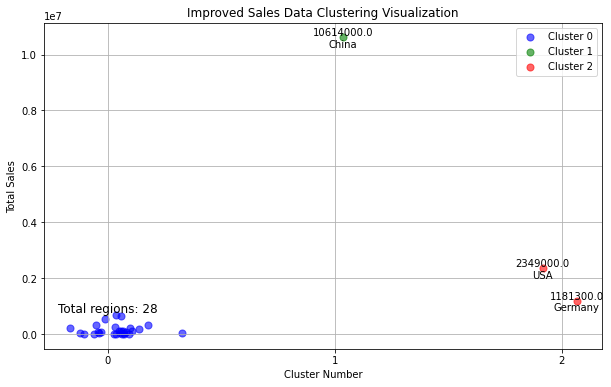

In [68]:
# 绘制散点图
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple']  # 不同聚类的颜色
jitter_strength = 0.1  # 抖动强度，方便更清晰的看图

for i in range(3):
    # 筛选属于当前聚类的国家
    cluster_sales = clustered_data[clustered_data['Cluster'] == i]['Total Sales']
    cluster_data = clustered_data[clustered_data['Cluster'] == i]
    cluster_countries = cluster_data['Country']
    # 添加抖动
    jitter = np.random.normal(0, jitter_strength, size=cluster_sales.size)
    plt.scatter(x=np.repeat(i, cluster_sales.size) + jitter, y=cluster_sales, alpha=0.6, s=50, color=colors[i], label=f'Cluster {i}')
    
    x_coords = np.repeat(i, cluster_sales.size) + jitter
    
    # 为 Cluster 2 和 Cluster 1 添加数据标签
    if i in [1,2]:
        for j, txt in enumerate(cluster_sales):
            country = cluster_countries.iloc[j]
            label_text = f"{txt}\n{country}" if i in [1,2] else str(txt)
            plt.annotate(label_text, (x_coords[j], cluster_sales.iloc[j]), textcoords="offset points", xytext=(0,10), ha='center',va = 'top')

    # 为 Cluster 0 显示总数
    if i == 0:
        total_sales_cluster0 = len(cluster_countries)
        plt.text(i, cluster_sales.max(), f'Total regions: {total_sales_cluster0}', fontsize=12, ha='center',va = 'bottom')

plt.title('Region Sales Data Clustering Visualization')
plt.xlabel('Cluster Number')
plt.ylabel('Total Sales')
plt.xticks([0, 1, 2])  # 设置x轴刻度
plt.legend()
plt.grid(True)
plt.show()
